In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [33]:
import matplotlib

# Parameters for matplotlib (these should be the same as the ones used for SHD)
fontsize = 20
matplotlib.rcParams.update({
    "font.size": fontsize,
    "axes.titlesize": fontsize,
    "axes.labelsize": fontsize, #* 2,
    "xtick.labelsize": fontsize-8,
    "ytick.labelsize": fontsize-8,
    "xtick.major.size": fontsize * .8,
    "ytick.major.size": fontsize * .8,
    "legend.fontsize": fontsize,
    #"font.family": "Times new Roman",
    "figure.dpi": 100,
    "savefig.dpi": 300,
    #"text.usetex": True,
    "path.simplify": True,
    "figure.figsize": (8, 6)
})

plt.rcParams["figure.facecolor"] = "w"


# Class to deal in an easy way with number of digits in colorbars (used for ULs and sigma maps)
class FormatScalarFormatter(matplotlib.ticker.ScalarFormatter):
            def __init__(self, fformat="%1.1f", offset=True, mathText=True):
                self.fformat = fformat
                matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,
                                                        useMathText=mathText)
            def _set_format(self):
                self.format = self.fformat
                if self._useMathText:
                    #self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)
                    self.format = '$%s$' % ('\\mathdefault{%s}' % self.format)

\begin{equation}
|E_t|^{2} = E_{0}^{2} \frac{t_{1}^{2}t_{2}^{2}}{1+(r_{1}r_{2})^{2}-2r_{1}r_{2}\cos 2k_{L}L}
\end{equation}

Plot in $2k_{L}/L$ units,  $k_{L}=\omega_{L}/c$

In [34]:
def power_out(x, r12=1, t12=1, P0 = 1):
    return (P0*t12)**2/(1+(r12)**2-2*r12*np.cos(x))

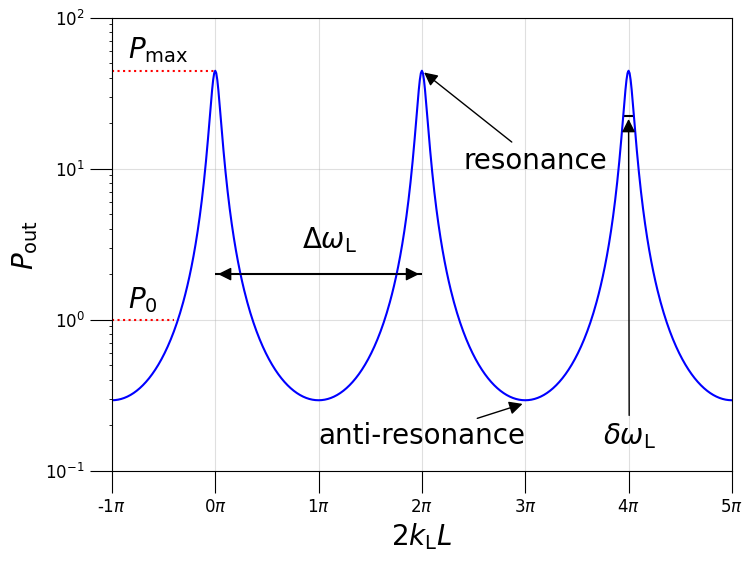

In [35]:
x = np.linspace(-np.pi, 5*np.pi, 601)
Pout = power_out(x, r12 = 0.85)

plt.plot(x, Pout, color = "blue")
plt.hlines(2, 0, 2*np.pi, color = "black")
plt.yscale("log")
plt.xlim(-np.pi, 5*np.pi)
plt.xticks(ticks=np.append(-np.pi,np.arange(0, 16, np.pi)), labels=[f"{i}"+r"$\pi$" for i in range(-1,6)])
plt.ylim(0.1, 100)

plt.annotate("anti-resonance",
            xy=(3*np.pi, 0.28), xycoords='data',
            xytext=(np.pi, 0.15), textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='k', lw=1),
            )

plt.annotate("resonance",
            xy=(2*np.pi, np.max(Pout)), xycoords='data',
            xytext=(2.4*np.pi, 10), textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='k', lw=1),
            )

plt.annotate("",
            xy=(0, 2), xycoords='data',
            xytext=(2*np.pi, 2), textcoords='data',
            arrowprops=dict(arrowstyle="<|-|>",
                            connectionstyle="arc3", color='k', lw=1),
            )

plt.annotate(r"$\Delta\omega_{\mathrm{L}}$",
             xy=(0, 2), xycoords='data',
             xytext=(np.pi-0.5, 3), textcoords='data')

plt.hlines(np.max(Pout), -np.pi, 0, color = "r", linestyles="dotted")
plt.hlines(1, -np.pi, -0.4*np.pi, color = "r", linestyles="dotted")
plt.hlines(np.max(Pout)/2, 4*np.pi-0.3257556520186653/2, 4*np.pi+0.3257556520186653/2, color = "k")

plt.annotate(r"$\delta \omega_{\mathrm{L}}$",
            xy=(4*np.pi, np.max(Pout)/2), xycoords='data',
            xytext=(3.75*np.pi, 0.15), textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='k', lw=1),
            )

plt.annotate(r"$P_{0}$",
             xy=(-np.pi, 2), xycoords='data',
             xytext=(-np.pi+0.5, 1.2), textcoords='data')

plt.annotate(r"$P_{\rm max}$",
             xy=(-np.pi, 2), xycoords='data',
             xytext=(-np.pi+0.5, np.max(Pout)+10), textcoords='data')

plt.xlabel(r"$2k_{\rm L} L$")
plt.ylabel("$P_{\mathrm{out}}$")

plt.grid(alpha = 0.4)
plt.savefig("./free_spectral_range_full_width_half_maximum.pdf", bbox_inches = "tight")
plt.show()

In [36]:
free_spectral_range = 2*np.pi
full_width_half = 2*free_spectral_range/np.pi*np.arcsin((1-0.85)/(2*np.sqrt(0.85)))
finesse = free_spectral_range/full_width_half
print(free_spectral_range, full_width_half, finesse, np.pi/(2*np.arcsin((1-0.85)/(2*np.sqrt(0.85)))))

6.283185307179586 0.3257556520186653 19.288031591297052 19.288031591297052


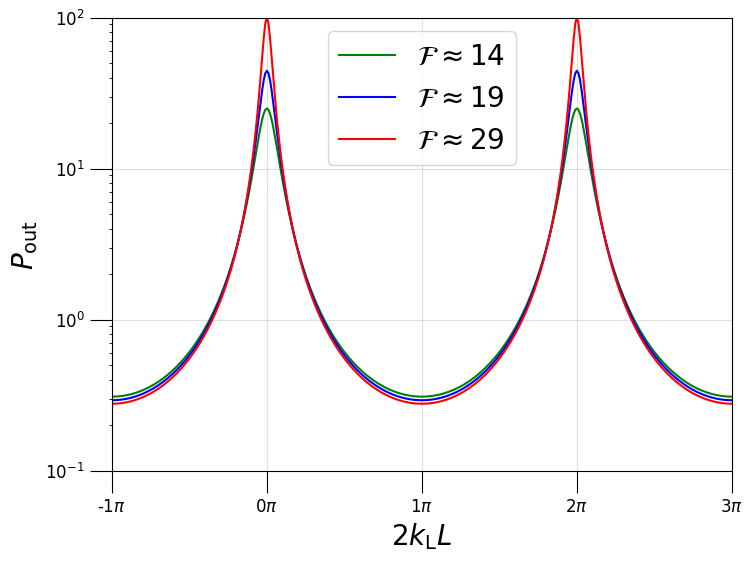

In [39]:
x = np.linspace(-np.pi, 3*np.pi, 401)

for r12, color in zip([0.8, 0.85, 0.9], ["green", "blue", "red"]):
    Pout = power_out(x, r12 = r12)
    finesse = np.pi/(2*np.arcsin((1-r12)/(2*np.sqrt(r12))))
    plt.plot(x, Pout, color = color, label = r"$\mathcal{F} \approx$"+f"{int(finesse)}")

plt.yscale("log")
plt.xlim(-np.pi, 3*np.pi)
plt.xticks(ticks=np.append(-np.pi,np.arange(0, 10, np.pi)), labels=[f"{i}"+r"$\pi$" for i in range(-1,4)])
plt.ylim(0.1, 100)


plt.xlabel(r"$2k_{\rm L} L$")
plt.ylabel("$P_{\mathrm{out}}$")

plt.grid(alpha = 0.4)
plt.legend()
plt.savefig("./finesse_effect.pdf", bbox_inches = "tight")
plt.show()

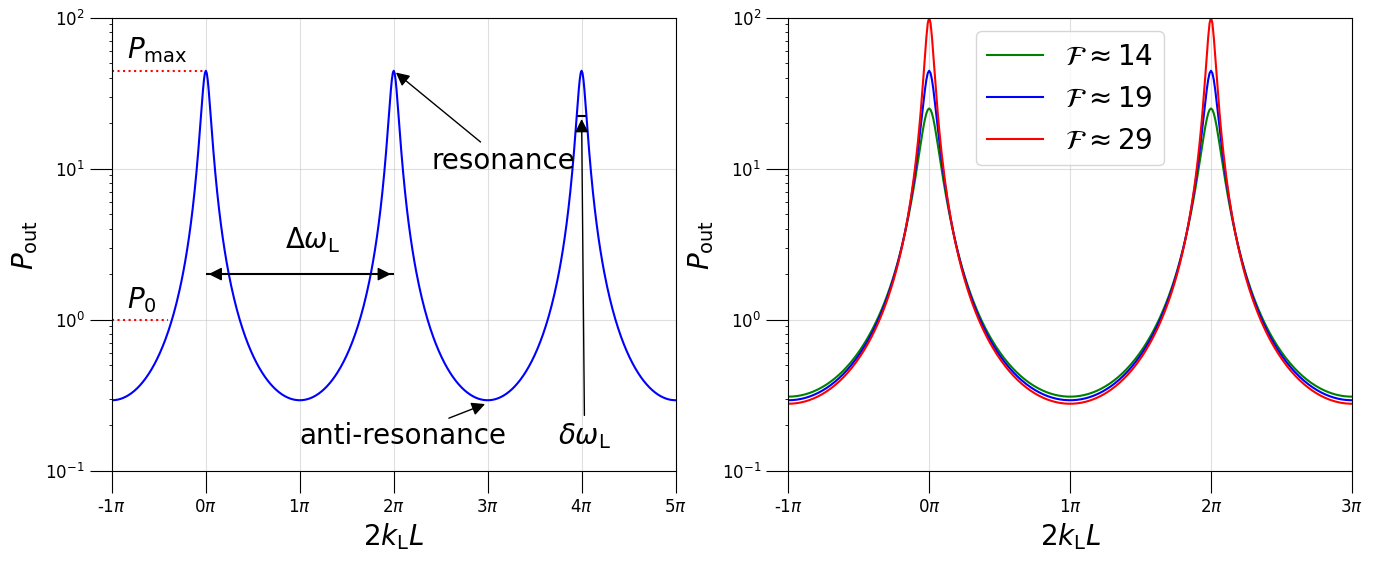

In [40]:
fig, (ax_single, ax_finesse) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

x = np.linspace(-np.pi, 5*np.pi, 601)
Pout = power_out(x, r12 = 0.85)

ax_single.plot(x, Pout, color = "blue")
ax_single.hlines(2, 0, 2*np.pi, color = "black")
ax_single.set_yscale("log")
ax_single.set_xlim(-np.pi, 5*np.pi)
ax_single.set_xticks(ticks=np.append(-np.pi,np.arange(0, 16, np.pi)))
ax_single.set_xticklabels(labels=[f"{i}"+r"$\pi$" for i in range(-1,6)])
ax_single.set_ylim(0.1, 100)

ax_single.annotate("anti-resonance",
            xy=(3*np.pi, 0.28), xycoords='data',
            xytext=(np.pi, 0.15), textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='k', lw=1),
            )

ax_single.annotate("resonance",
            xy=(2*np.pi, np.max(Pout)), xycoords='data',
            xytext=(2.4*np.pi, 10), textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='k', lw=1),
            )

ax_single.annotate("",
            xy=(0, 2), xycoords='data',
            xytext=(2*np.pi, 2), textcoords='data',
            arrowprops=dict(arrowstyle="<|-|>",
                            connectionstyle="arc3", color='k', lw=1),
            )

ax_single.annotate(r"$\Delta\omega_{\mathrm{L}}$",
             xy=(0, 2), xycoords='data',
             xytext=(np.pi-0.5, 3), textcoords='data')

ax_single.hlines(np.max(Pout), -np.pi, 0, color = "r", linestyles="dotted")
ax_single.hlines(1, -np.pi, -0.4*np.pi, color = "r", linestyles="dotted")
ax_single.hlines(np.max(Pout)/2, 4*np.pi-0.3257556520186653/2, 4*np.pi+0.3257556520186653/2, color = "k")

ax_single.annotate(r"$\delta \omega_{\mathrm{L}}$",
            xy=(4*np.pi, np.max(Pout)/2), xycoords='data',
            xytext=(3.75*np.pi, 0.15), textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='k', lw=1),
            )

ax_single.annotate(r"$P_{0}$",
             xy=(-np.pi, 2), xycoords='data',
             xytext=(-np.pi+0.5, 1.2), textcoords='data')

ax_single.annotate(r"$P_{\rm max}$",
             xy=(-np.pi, 2), xycoords='data',
             xytext=(-np.pi+0.5, np.max(Pout)+10), textcoords='data')

ax_single.set_xlabel(r"$2k_{\rm L} L$")
ax_single.set_ylabel("$P_{\mathrm{out}}$")

ax_single.grid(alpha = 0.4)


for r12, color in zip([0.8, 0.85, 0.9], ["green", "blue", "red"]):
    Pout = power_out(x, r12 = r12)
    finesse = np.pi/(2*np.arcsin((1-r12)/(2*np.sqrt(r12))))
    ax_finesse.plot(x, Pout, color = color, label = r"$\mathcal{F} \approx$"+f"{int(finesse)}")

ax_finesse.set_yscale("log")
ax_finesse.set_xlim(-np.pi, 3*np.pi)
ax_finesse.set_xticks(ticks=np.append(-np.pi,np.arange(0, 10, np.pi)))
ax_finesse.set_xticklabels(labels=[f"{i}"+r"$\pi$" for i in range(-1,4)])
ax_finesse.set_ylim(0.1, 100)


ax_finesse.set_xlabel(r"$2k_{\rm L} L$")
ax_finesse.set_ylabel("$P_{\mathrm{out}}$")

ax_finesse.grid(alpha = 0.4)
ax_finesse.legend()

plt.savefig("./finesse_and_related_quantities.pdf", bbox_inches = "tight")
plt.show()